In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [98]:
def generate_dummy_eeg_data(params, buffer_duration):
    # Extract parameters from JSON dictionary
    num_channels = params.get("eeg_channels", 8)
    samples_per_second = params.get("sampling_rate", 256)
    epoch_period = buffer_duration
    noise_level = params.get("noise", 1)
    artifact_prob = params.get("artifacts", 0.01)
    modulation_type = params.get("modulation_type", 'sinusoidal')
    preset = params.get("preset", None)
    sequence = params.get("sequence", None)
    correlation_strength = params.get("correlation_strength", 0.5)  # Strength of correlation between nearby channels
    power_law_slope = params.get("power_law_slope", 1.0)

    # Preset amplitude settings
    preset_settings = {
        'focus': [0.1, 0.1, 0.5, 0.8, 0.4],
        'alert': [0.1, 0.1, 0.4, 0.9, 0.3],
        'relaxed': [0.2, 0.2, 0.7, 0.3, 0.2],
        'drowsy': [0.4, 0.6, 0.2, 0.2, 0.1],
    }

    if preset in preset_settings:
        delta_amp, theta_amp, alpha_amp, beta_amp, gamma_amp = preset_settings[preset]
    else:
        delta_amp = params.get("delta_amp", 0.1)
        theta_amp = params.get("theta_amp", 0.1)
        alpha_amp = params.get("alpha_amp", 0.1)
        beta_amp = params.get("beta_amp", 0.1)
        gamma_amp = params.get("gamma_amp", 0.1)

    total_samples = samples_per_second * epoch_period
    t = np.linspace(0, epoch_period, total_samples, endpoint=False)
    eeg_data = np.zeros((num_channels, total_samples))

    # Frequency bands
    bands = {
        'Delta': (0.5, 4),
        'Theta': (4, 8),
        'Alpha': (8, 13),
        'Beta': (13, 30),
        'Gamma': (30, 100)
    }

    amplitudes = {
        'Delta': delta_amp,
        'Theta': theta_amp,
        'Alpha': alpha_amp,
        'Beta': beta_amp,
        'Gamma': gamma_amp
    }

    if modulation_type == 'sinusoidal':
        modulating_freq = 0.1
        delta_mod = (1 + np.sin(2 * np.pi * modulating_freq * t)) / 2
        theta_mod = (1 + np.cos(2 * np.pi * modulating_freq * t)) / 2
        alpha_mod = (1 + np.sin(2 * np.pi * modulating_freq * t + np.pi / 4)) / 2
        beta_mod = (1 + np.cos(2 * np.pi * modulating_freq * t + np.pi / 4)) / 2
        gamma_mod = (1 + np.sin(2 * np.pi * modulating_freq * t + np.pi / 2)) / 2
    elif modulation_type == 'random':
        delta_mod = np.abs(np.random.randn(total_samples))
        theta_mod = np.abs(np.random.randn(total_samples))
        alpha_mod = np.abs(np.random.randn(total_samples))
        beta_mod = np.abs(np.random.randn(total_samples))
        gamma_mod = np.abs(np.random.randn(total_samples))

    for band, (low, high) in bands.items():
        amplitude = amplitudes[band]
        freqs = np.linspace(low, high, int(samples_per_second / 2))
        power_law = freqs ** -power_law_slope

        for i in range(num_channels):
            for f, p in zip(freqs, power_law):
                phase = np.random.uniform(0, 2 * np.pi)
                if band == 'Delta':
                    eeg_data[i] += amplitude * p * delta_mod * np.sin(2 * np.pi * f * t + phase)
                elif band == 'Theta':
                    eeg_data[i] += amplitude * p * theta_mod * np.sin(2 * np.pi * f * t + phase)
                elif band == 'Alpha':
                    eeg_data[i] += amplitude * p * alpha_mod * np.sin(2 * np.pi * f * t + phase)
                elif band == 'Beta':
                    eeg_data[i] += amplitude * p * beta_mod * np.sin(2 * np.pi * f * t + phase)
                elif band == 'Gamma':
                    eeg_data[i] += amplitude * p * gamma_mod * np.sin(2 * np.pi * f * t + phase)

    eeg_data += noise_level * np.random.randn(num_channels, total_samples)

    for channel in range(1, num_channels):
        eeg_data[channel] += correlation_strength * eeg_data[channel - 1]

    artifact_indices = np.random.choice(total_samples, int(artifact_prob * total_samples), replace=False)
    for channel in range(0, num_channels):
        eeg_data[channel, artifact_indices] -= np.random.uniform(10, 20, len(artifact_indices))

    if sequence:
        full_data = []
        for seq in sequence:
            preset, duration = seq
            temp_params = params.copy()
            temp_params['preset'] = preset
            temp_params['epoch_period'] = duration
            temp_params['sequence'] = None
            segment = generate_dummy_eeg_data(temp_params)
            full_data.append(segment)
        eeg_data = np.hstack(full_data)

    return eeg_data

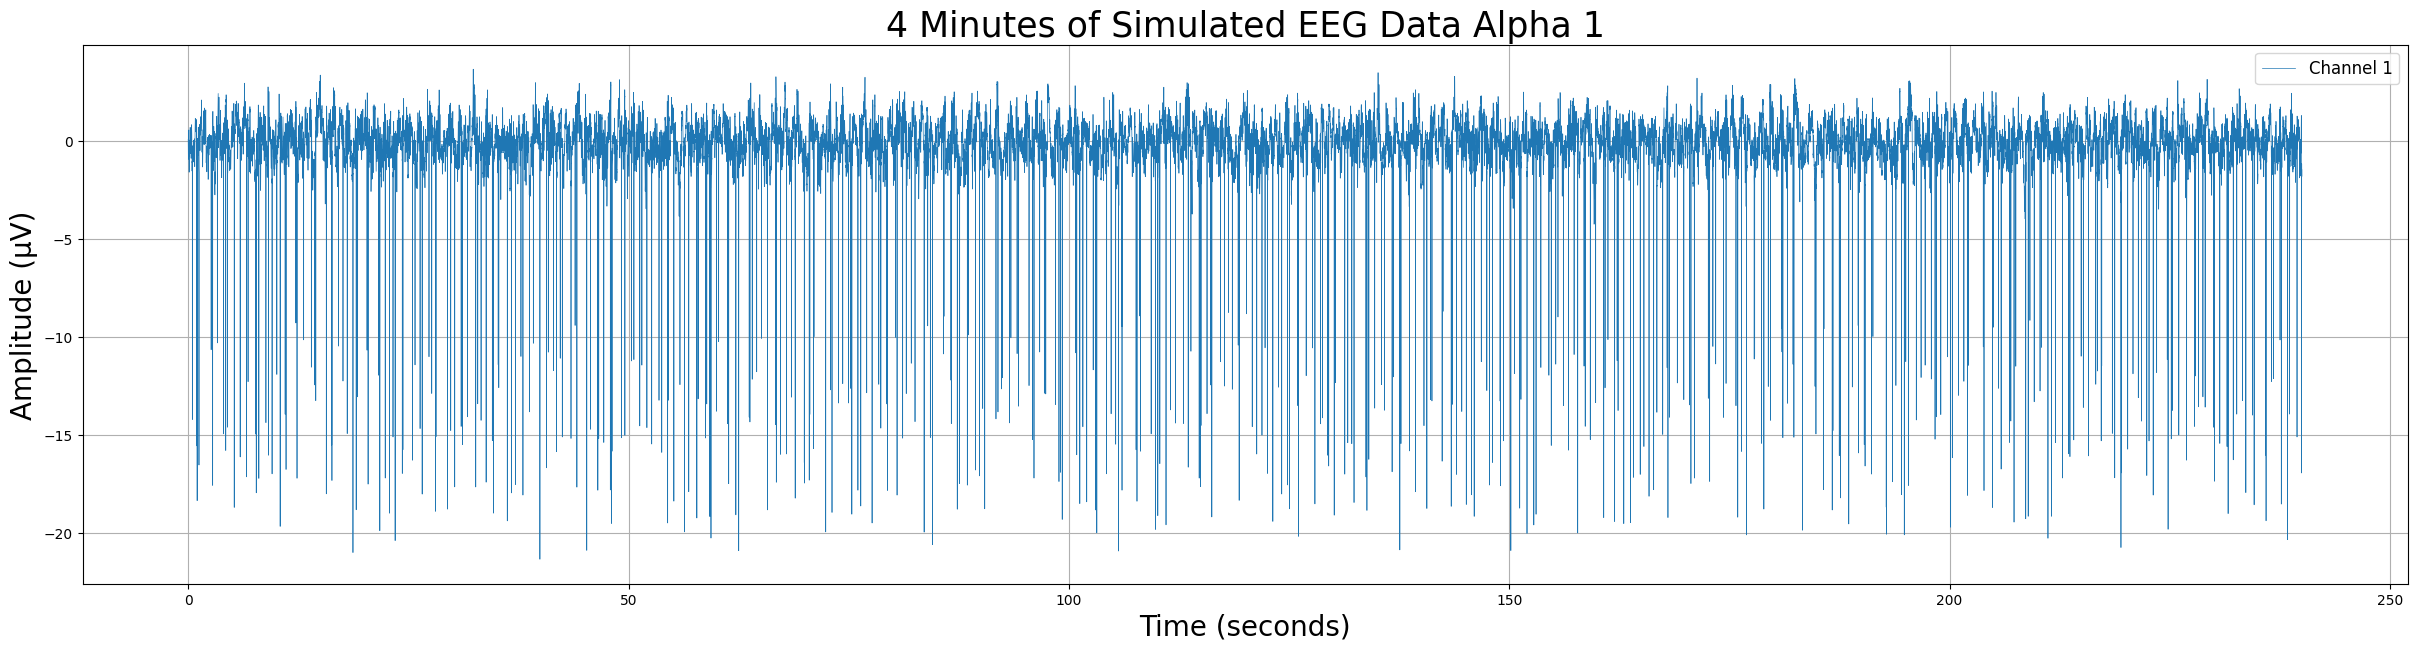

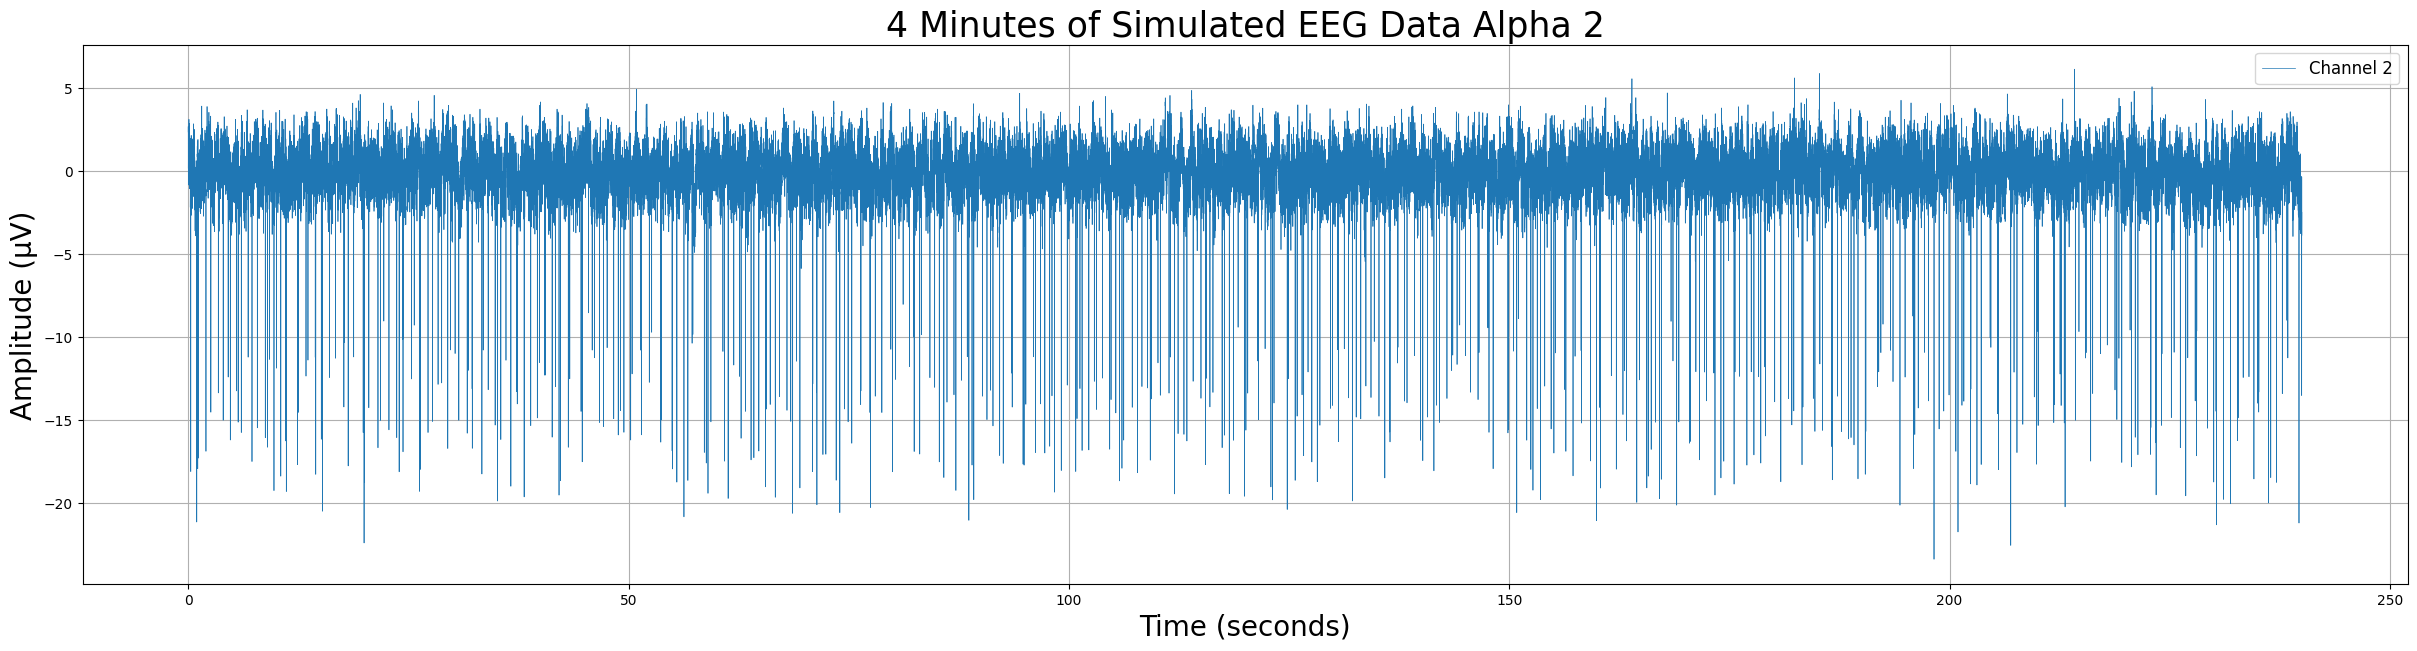

Amplitudes Alpha 1 :
Delta: 0.1
Theta: 0.1
Alpha: 0.1
Beta: 0.1
Gamma: 0.1
Amplitudes Alpha 2 :
Delta: 0.1
Theta: 0.1
Alpha: 0.5
Beta: 0.1
Gamma: 0.1
Alpha amplitudes are different: True


'\n# Calculate and print the noise amplitude\nnoise_amplitude1 = np.std(noise_data1)\nnoise_amplitude2 = np.std(noise_data2)\n\nprint(f"Noise amplitude for params1: {noise_amplitude1}")\nprint(f"Noise amplitude for params2: {noise_amplitude2}")\n\n'

In [99]:

# Set up parameters
params1 = {
    "eeg_channels": 1,
    "sampling_rate": 256,
    "noise": 0.1,
    "artifacts": 0.01,
    "modulation_type": 'sinusoidal',
    "preset": 'relaxed',
    "correlation_strength": 0.005,
    "power_law_slope": 1.0
}

params2 = {
    "eeg_channels": 1,
    "sampling_rate": 256,
    "noise": 0.9,
    "artifacts": 0.01,
    "modulation_type": 'sinusoidal',
    "preset": 'relaxed',
    "correlation_strength": 0.005,
    "power_law_slope": 1.0
}

#--------------------------------------------------------------------------------------------------------------
# Generate 4 minutes of data for params1
total_duration = 240  # 4 minutes in seconds
buffer_duration = 1  # 1 second buffer

eeg_data_list1 = []
for _ in range(total_duration):
    chunk1 = generate_dummy_eeg_data(params1, buffer_duration)
    eeg_data_list1.append(chunk1)

eeg_data1 = np.hstack(eeg_data_list1)

# Plot the data for params1
plt.figure(figsize=(30, 7))
time1 = np.linspace(0, total_duration, eeg_data1.shape[1])

for i in range(params1["eeg_channels"]):
    plt.plot(time1, eeg_data1[i] + i*100, label=f'Channel {i+1}', linewidth=0.5)

plt.xlabel('Time (seconds)', fontsize=20)
plt.ylabel('Amplitude (μV)', fontsize=20)
plt.title('4 Minutes of Simulated EEG Data Alpha 1', fontsize=25)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

#--------------------------------------------------------------------------------------------------------------
# Generate 4 minutes of data for params2
eeg_data_list2 = []
for _ in range(total_duration):
    chunk2 = generate_dummy_eeg_data(params2, buffer_duration)
    eeg_data_list2.append(chunk2)

eeg_data2 = np.hstack(eeg_data_list2)

# Plot the data for params2
plt.figure(figsize=(30, 7))
time2 = np.linspace(0, total_duration, eeg_data2.shape[1])

for i in range(params2["eeg_channels"]):
    plt.plot(time2, eeg_data2[i] + i*100, label=f'Channel {i+2}', linewidth=0.5)

plt.xlabel('Time (seconds)', fontsize=20)
plt.ylabel('Amplitude (μV)', fontsize=20)
plt.title('4 Minutes of Simulated EEG Data Alpha 2', fontsize=25)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

#--------------------------------------------------------------------------------------------------------------
# Retrieve and compare the alpha amplitude values
alpha_amp1 = params1.get('alpha_amp', 0.1)
alpha_amp2 = params2.get('alpha_amp', 0.5)

print("Amplitudes Alpha 1 :")
print(f"Delta: {params1.get('delta_amp', 0.1)}")
print(f"Theta: {params1.get('theta_amp', 0.1)}")
print(f"Alpha: {alpha_amp1}")
print(f"Beta: {params1.get('beta_amp', 0.1)}")
print(f"Gamma: {params1.get('gamma_amp', 0.1)}")

print("Amplitudes Alpha 2 :")
print(f"Delta: {params2.get('delta_amp', 0.1)}")
print(f"Theta: {params2.get('theta_amp', 0.1)}")
print(f"Alpha: {alpha_amp2}")
print(f"Beta: {params2.get('beta_amp', 0.1)}")
print(f"Gamma: {params2.get('gamma_amp', 0.1)}")

# Compare the alpha amplitude values
if alpha_amp1 == alpha_amp2:
    result = "False"
else:
    result = "True"

print(f"Alpha amplitudes are different: {result}")

#--------------------------------------------------------------------------------------------------------------
"""
# Calculate and print the noise amplitude
noise_amplitude1 = np.std(noise_data1)
noise_amplitude2 = np.std(noise_data2)

print(f"Noise amplitude for params1: {noise_amplitude1}")
print(f"Noise amplitude for params2: {noise_amplitude2}")

"""

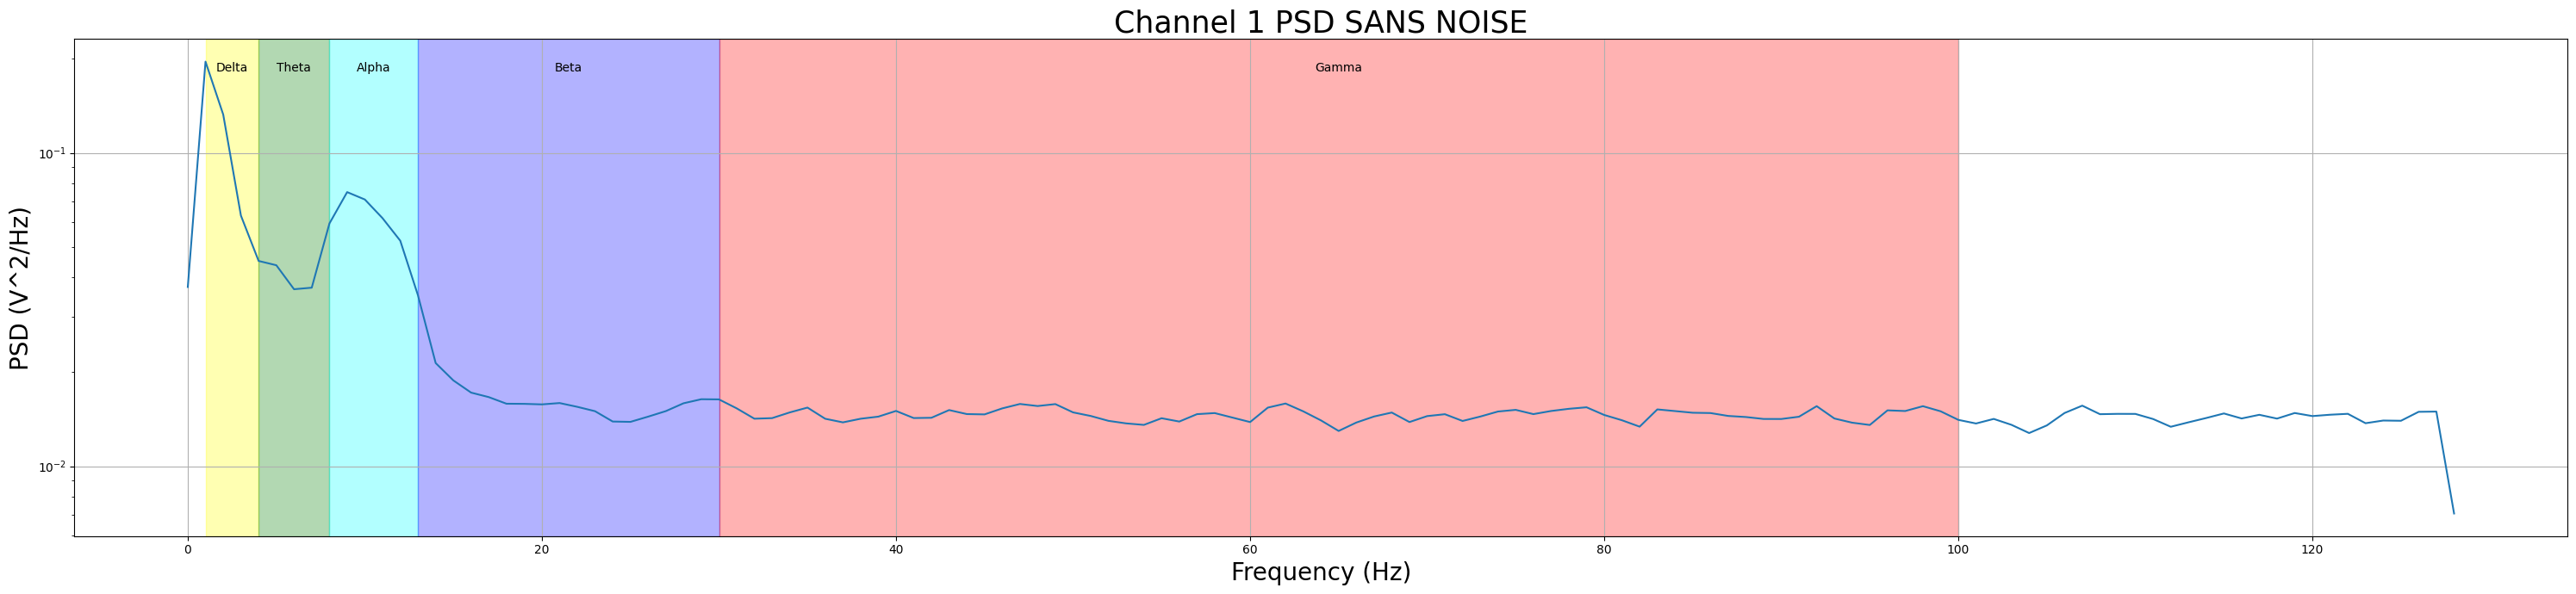

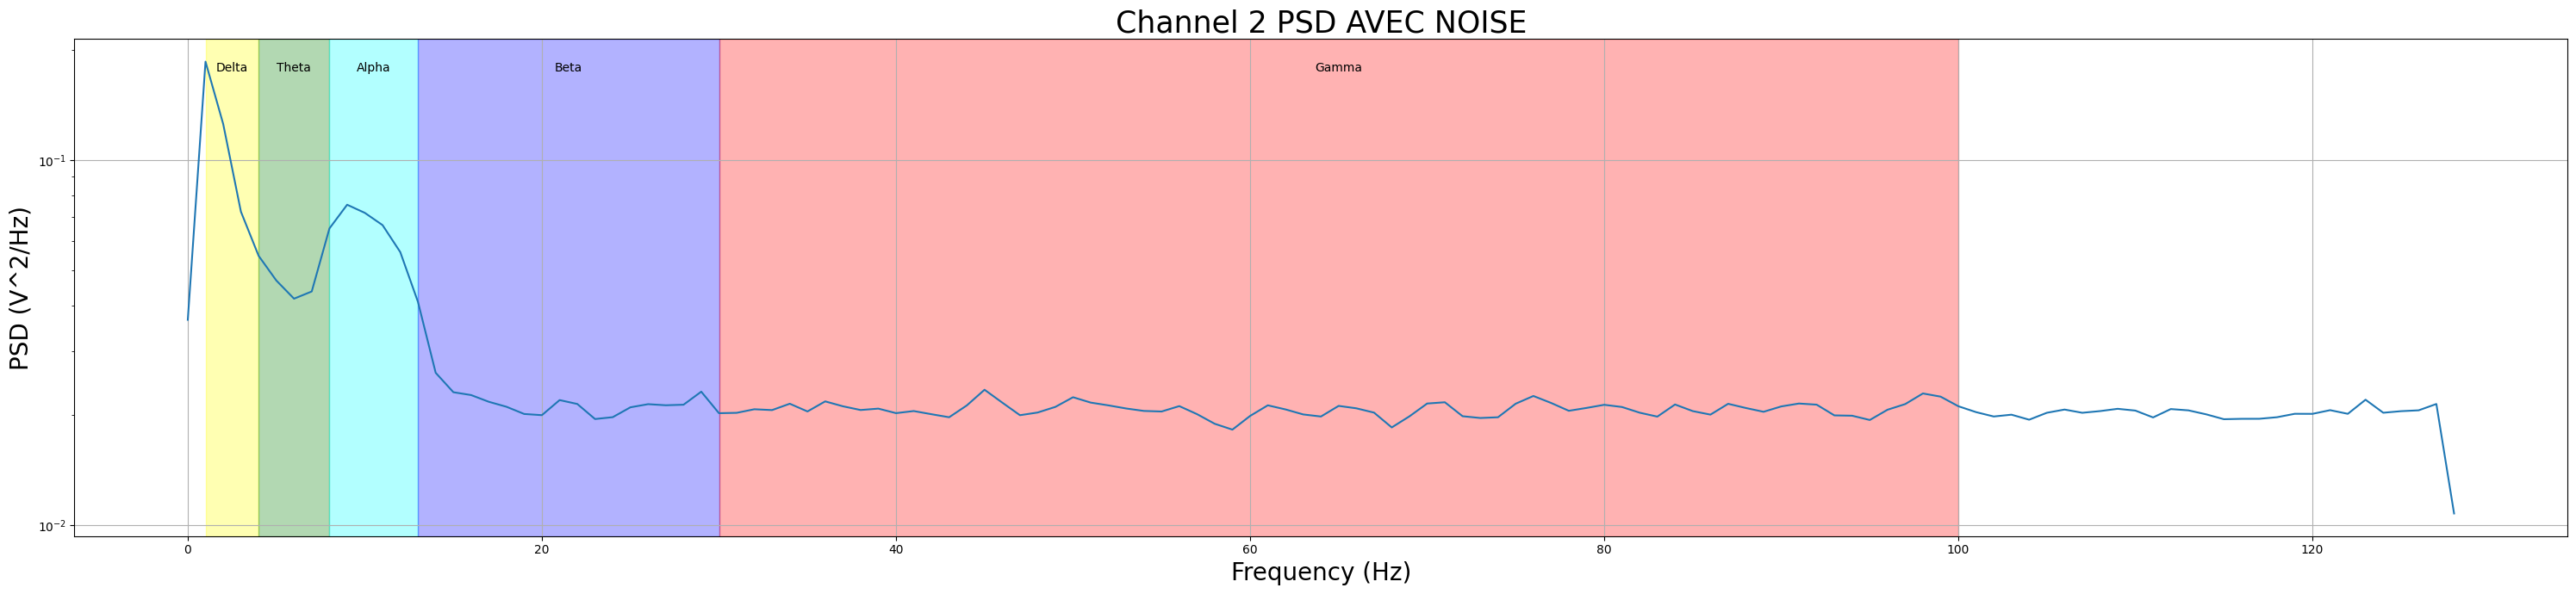

In [100]:

# Define frequency bands
bands = {
    'Delta': (1, 4, 'yellow'),
    'Theta': (4, 8, 'green'),
    'Alpha': (8, 13, 'cyan'),
    'Beta': (13, 30, 'blue'),
    'Gamma': (30, 100, 'red')
}
#--------------------------------------------------------------------------------------------------------------
# Plot PSD for params1
fig, axes = plt.subplots(params1["eeg_channels"], 1, figsize=(30, 7), sharex=True)

if params1["eeg_channels"] == 1:
    axes = [axes]

for i in range(params1["eeg_channels"]):
    freqs, psd = signal.welch(eeg_data1[i], fs=params1["sampling_rate"])
    axes[i].semilogy(freqs, psd)
    axes[i].set_title((f'Channel {i+1} PSD SANS NOISE'),fontsize=25)
    axes[i].set_ylabel(('PSD (V^2/Hz)'),fontsize=20)
    axes[i].grid(True)

    for band, (low, high, col) in bands.items():
        axes[i].axvspan(low, high, color=col, alpha=0.3)
        axes[i].text((low + high) / 2, max(psd), band, horizontalalignment='center', verticalalignment='top')

axes[-1].set_xlabel(('Frequency (Hz)'),fontsize=20)
plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------------------------------------
# Plot PSD for params2
fig, axes = plt.subplots(params2["eeg_channels"], 1, figsize=(30, 7), sharex=True)

if params2["eeg_channels"] == 1:
    axes = [axes]

for i in range(params2["eeg_channels"]):
    freqs, psd = signal.welch(eeg_data2[i], fs=params2["sampling_rate"])
    axes[i].semilogy(freqs, psd)
    axes[i].set_title((f'Channel {i+2} PSD AVEC NOISE'),fontsize=25)
    axes[i].set_ylabel(('PSD (V^2/Hz)'),fontsize=20)
    axes[i].grid(True)

    for band, (low, high, col) in bands.items():
        axes[i].axvspan(low, high, color=col, alpha=0.3)
        axes[i].text((low + high) / 2, max(psd), band, horizontalalignment='center', verticalalignment='top')


axes[-1].set_xlabel(('Frequency (Hz)'),fontsize=20)
plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------------------------------------

